<a href="https://colab.research.google.com/github/suyashss/nn_test/blob/master/mnist_two_in_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import tensorflow.keras as keras

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import skimage
from skimage.transform import resize

In [ ]:
image_size = 96

In [ ]:
def resize_image(x):
  temp_im = np.pad(x.reshape((28,28,1)),((0,image_size-28),(0,image_size-28),(0,2)),'constant')
  return temp_im

In [ ]:
def get_images_and_labels(fname,n,resize=image_size):
  df = np.loadtxt(fname,delimiter=",")[:n,]
  train_labels = [x[0] for x in df]
  train_data = np.zeros((df.shape[0],image_size,image_size,3))
  for idx,x in enumerate(df):
    train_data[idx,:,:,:]=resize_image(x[1:df.shape[1]])
  print(train_data.shape)
  return train_data,train_labels

In [ ]:
train_data,train_labels = get_images_and_labels("sample_data/mnist_train_small.csv",20000)

(20000, 96, 96, 3)


In [ ]:
print(np.unique(train_labels,return_counts=True))

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([1962, 2243, 1989, 2021, 1924, 1761, 2039, 2126, 1912, 2023]))


# New Section

8264
6.0


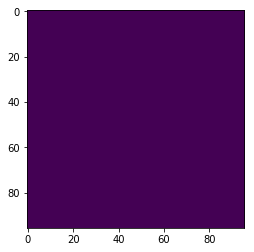

In [ ]:
idx = np.random.randint(train_data.shape[0])
print(idx)
print(train_labels[idx])
plt.imshow(train_data[idx,:,:,1].squeeze())

In [ ]:
test_data,test_labels = get_images_and_labels("sample_data/mnist_test.csv",5000)

(5000, 96, 96, 3)


In [ ]:
print(np.unique(test_labels,return_counts=True))

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([460, 571, 530, 500, 500, 456, 462, 512, 489, 520]))


260
5.0


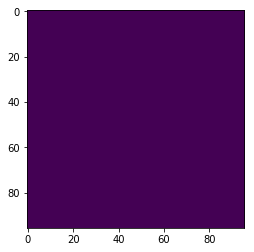

In [ ]:
idx = np.random.randint(train_data.shape[0])
print(idx)
print(train_labels[idx])
plt.imshow(train_data[idx,:,:,1].squeeze())

In [ ]:
#image_size = 160 # All images will be resized
batch_size = 32

# Rescale all images by 1./255 and apply image augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255,)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [ ]:
train_labels_categorical = keras.utils.to_categorical(train_labels,10)
test_labels_categorical = keras.utils.to_categorical(test_labels,10)

In [ ]:
train_generator = train_datagen.flow(x=train_data,y=train_labels_categorical,)

In [ ]:
validation_generator = validation_datagen.flow(x=test_data,y=test_labels_categorical)

In [ ]:
IMG_SHAPE = (image_size, image_size, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
#base_model.summary()

In [ ]:
model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.00001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Model)  (None, 3, 3, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
len(model.trainable_variables)

2

In [ ]:
epochs = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              workers=4,
                              validation_data=validation_generator, 
                              validation_steps=validation_steps)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
625/625 [==============================] - 38s 62ms/step - loss: 2.2781 - acc: 0.1486 - val_loss: 2.3713 - val_acc: 0.0988
Epoch 2/20
625/625 [==============================] - 32s 51ms/step - loss: 2.1384 - acc: 0.2290 - val_loss: 2.4152 - val_acc: 0.1844
Epoch 3/20
625/625 [==============================] - 32s 50ms/step - loss: 2.0007 - acc: 0.3039 - val_loss: 2.4963 - val_acc: 0.1094
Epoch 4/20
625/625 [==============================] - 32s 51ms/step - loss: 1.8616 - acc: 0.3750 - val_loss: 2.6309 - val_acc: 0.1326
Epoch 5/20
625/625 [==============================] - 32s 51ms/step - loss: 1.7307 - acc: 0.4250 - val_loss: 2.5767 - val_acc: 0.2034
Epoch 6/20
625/625 [==============================] - 32s 52ms/step - loss: 1.6192 - acc: 0.4751 - val_loss: 2.5054 - val_acc: 0.1432
Epoch 7/20
625/625 [==============================] - 32s 51ms/step - loss: 1.5233 - acc: 0.5060 - val_loss: 2.2750 - val_acc: 0.2408
Epoch 8/20
625

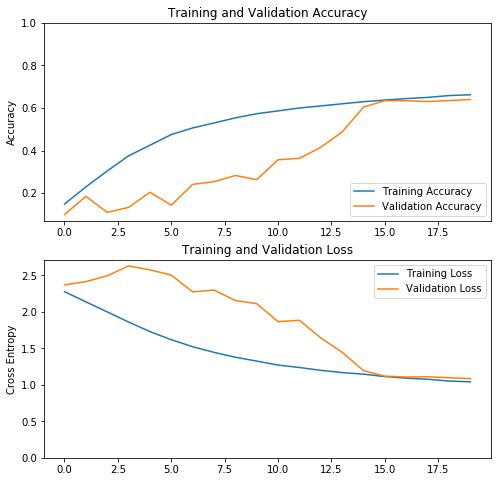

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Model)  (None, 3, 3, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 2,270,794
Trainable params: 1,875,402
Non-trainable params: 395,392
_________________________________________________________________


In [ ]:
len(model.trainable_variables)

58

In [ ]:
epochs2=20
history_fine = model.fit_generator(train_generator, 
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs2, 
                                   workers=4,
                                   validation_data=validation_generator, 
                                   validation_steps=validation_steps)

Epoch 1/20
625/625 [==============================] - 44s 70ms/step - loss: 0.6849 - acc: 0.7742 - val_loss: 0.6072 - val_acc: 0.8006
Epoch 2/20
625/625 [==============================] - 41s 65ms/step - loss: 0.4294 - acc: 0.8569 - val_loss: 0.4868 - val_acc: 0.8344
Epoch 3/20
625/625 [==============================] - 41s 65ms/step - loss: 0.3190 - acc: 0.8938 - val_loss: 0.4361 - val_acc: 0.8550
Epoch 4/20
625/625 [==============================] - 41s 65ms/step - loss: 0.2574 - acc: 0.9127 - val_loss: 0.3626 - val_acc: 0.8798
Epoch 5/20
625/625 [==============================] - 41s 66ms/step - loss: 0.2174 - acc: 0.9285 - val_loss: 0.3676 - val_acc: 0.8812
Epoch 6/20
625/625 [==============================] - 40s 65ms/step - loss: 0.1829 - acc: 0.9383 - val_loss: 0.3454 - val_acc: 0.8896
Epoch 7/20
625/625 [==============================] - 40s 65ms/step - loss: 0.1540 - acc: 0.9495 - val_loss: 0.3220 - val_acc: 0.9008
Epoch 8/20
625/625 [==============================] - 41s 65ms

In [ ]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

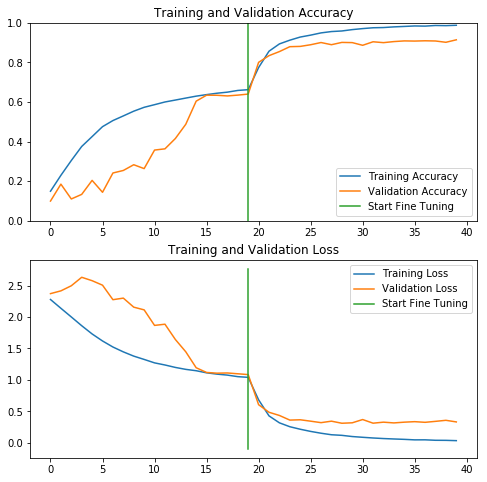

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
#plt.ylim([0, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()